# MNIST digits: Softmax Regression 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
# load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.reshape((X.shape[0], -1))

In [3]:
# generate training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

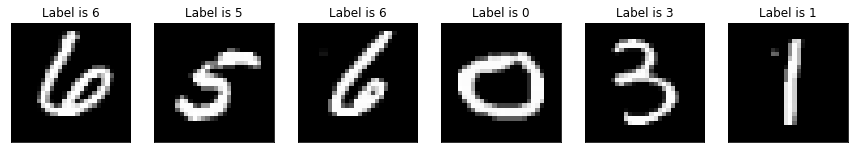

In [4]:
plt.subplots(1, 6, figsize=(15,5))
for i in range(6):
    index = 9000 + i # image number
    pixels = np.array(X_train[index], dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.subplot(1, 6, i+1)
    plt.title('Label is {label}'.format(label=y_train[index]))
    plt.imshow(pixels, cmap='gray')
    plt.xticks(())
    plt.yticks(())

In [5]:
# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(multi_class='multinomial',
                         penalty='none', solver='sag', tol=0.1)

In [6]:
# fit data
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', penalty='none', solver='sag',
                   tol=0.1)

In [7]:
#Test the model
predictions = clf.predict(X_test)

#Precision, recall, f1-score
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1353
           1       0.95      0.97      0.96      1569
           2       0.94      0.89      0.91      1398
           3       0.89      0.91      0.90      1445
           4       0.93      0.92      0.92      1341
           5       0.90      0.83      0.87      1268
           6       0.93      0.96      0.94      1348
           7       0.95      0.93      0.94      1501
           8       0.87      0.89      0.88      1369
           9       0.88      0.92      0.90      1408

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

0.9190714285714285


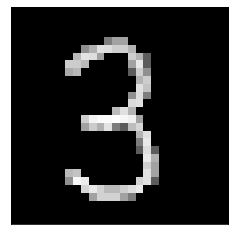

In [9]:
import png
filename = "your_own_digit.png"
image = np.zeros((1, 28, 28, 1), dtype=np.uint8)
pngdata = png.Reader(open(filename, 'rb')).asDirect()
for i_row, row in enumerate(pngdata[2]):
    image[0, i_row, :, 0] = row

plt.imshow(np.squeeze(image), cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()

# one digit, -1: unspecified number determined by numpy
my_digit = image.reshape((1,-1))

In [10]:
probabilities = clf.predict_proba(my_digit)
prediction = np.argmax(probabilities)
print(probabilities)
print(f"prediction = {prediction}")

[[5.34570315e-06 7.91453360e-05 7.96188095e-03 9.69029952e-01
  5.69491227e-05 2.48981207e-03 2.12702906e-07 2.81647721e-06
  2.02980887e-02 7.57970983e-05]]
prediction = 3
